<a href="https://colab.research.google.com/github/EdithOroche/IA/blob/main/Laboratorio00_Introduccion_Procesamiento_Imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Introducción al Procesamiento de Imágenes en Google Colab**

> Objetivo: entender qué es una imagen digital (como matriz de píxeles) y realizar operaciones básicas: cargar, visualizar, convertir a escala de grises/binaria, cambiar tamaño, recortar y voltear.


## 0) Preparación del entorno
Instalamos/confirmamos librerías y configuramos imports básicos.


In [ ]:
!pip -q install opencv-python-headless scikit-image

import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage import data

%matplotlib inline

print("Versión de NumPy:", np.__version__)
print("Versión de OpenCV:", cv2.__version__)

Versión de NumPy: 2.0.2
Versión de OpenCV: 4.12.0


## 1) Conceptos básicos
- **Imagen digital**: matriz de píxeles.
- **Escala de grises**: matriz 2D con valores 0–255 (uint8).
- **Color (RGB)**: tensor 3D (alto × ancho × 3) con canales R, G y B.
- **Resolución**: ancho × alto. **Profundidad de color**: rango de valores (8 bits → 0–255).

> En esta clase trabajaremos con imágenes de ejemplo y/o una imagen propia.



## 2) Cargar imágen

Ejecuta esta celda para **subir una imagen** desde tu computadora (JPG/PNG). Si no subes nada, en la siguiente sección usaremos una **imagen de ejemplo**.


In [ ]:
from google.colab import files

uploaded = files.upload()
img_path = None
if uploaded:
    img_path = list(uploaded.keys())[0]
    print("Archivo subido:", img_path)
else:
    print("No se subió ningún archivo. Usaremos una imagen de ejemplo en la siguiente celda.")

Saving lena.jpg to lena.jpg
Archivo subido: lena.jpg



## 3) Cargar imagen (opción B: ejemplo integrado)
Usaremos una imagen de muestra de `skimage.data` si no subiste nada. También es útil para pruebas rápidas.


Imagen cargada desde archivo. Forma: (512, 512, 3)


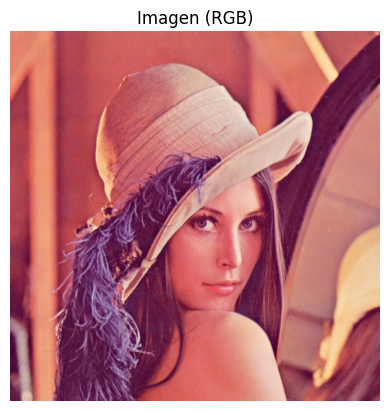

In [ ]:
bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)
if bgr is None:
    raise ValueError("No se pudo leer la imagen cargada. Verifica el formato.")
img_rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
print("Imagen cargada desde archivo. Forma:", img_rgb.shape)

plt.imshow(img_rgb)
plt.title("Imagen (RGB)")
plt.axis("off")
plt.show()


## 4) Explorando la matriz de píxeles
Revisamos forma, tipo de datos y accedemos a algunos píxeles y canales.


Forma (alto, ancho, canales): (512, 512, 3)
Tipo de datos: uint8
Alto: 512 | Ancho: 512 | Canales: 3
Píxel en (fila=256, col=256): [171  65  79]


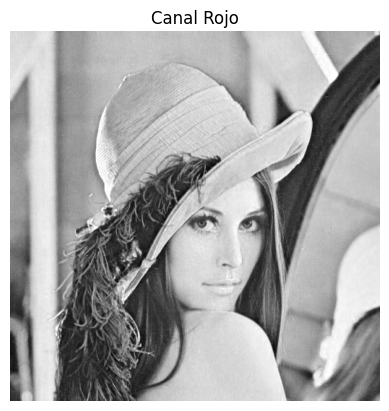

In [ ]:
print("Forma (alto, ancho, canales):", img_rgb.shape)
print("Tipo de datos:", img_rgb.dtype)

alto, ancho, canales = img_rgb.shape
print(f"Alto: {alto} | Ancho: {ancho} | Canales: {canales}")

fila = alto // 2
col = ancho // 2
pixel = img_rgb[fila, col]  # [R, G, B]
print(f"Píxel en (fila={fila}, col={col}):", pixel)

# Acceso a un canal (ej: canal rojo)
canal_rojo = img_rgb[:, :, 0]
plt.imshow(canal_rojo, cmap="gray")
plt.title("Canal Rojo")
plt.axis("off")
plt.show()


## 5) Operaciones básicas: resize, recorte (slicing) y volteo


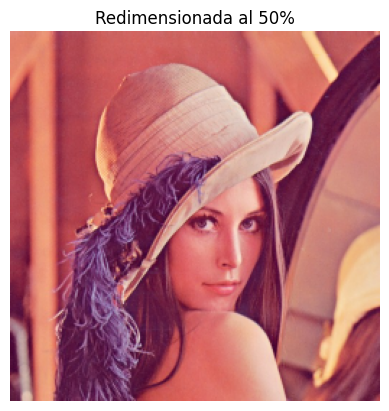

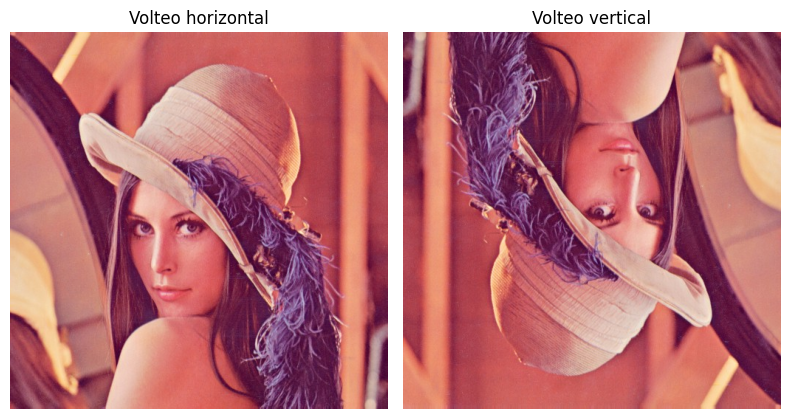

In [ ]:
# Cambiar tamaño (50%)
nuevo_ancho = img_rgb.shape[1] // 2
nuevo_alto  = img_rgb.shape[0] // 2
img_small = cv2.resize(img_rgb, (nuevo_ancho, nuevo_alto), interpolation=cv2.INTER_AREA)

plt.imshow(img_small)
plt.title("Redimensionada al 50%")
plt.axis("off")
plt.show()

# Volteo horizontal (flipcode=1) y vertical (flipcode=0)
flip_h = cv2.flip(img_rgb, 1)
flip_v = cv2.flip(img_rgb, 0)

fig = plt.figure(figsize=(8, 6))
plt.subplot(1,2,1); plt.imshow(flip_h); plt.title("Volteo horizontal"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(flip_v); plt.title("Volteo vertical"); plt.axis("off")
plt.tight_layout(); plt.show()



## 6) Ejercicio

En la siguiente celda, usando el código anterior, haz todo lo siguiente:

1. Carga otra imagen (sube un archivo) con tonalidad **azul** (ejemplo: mar).  
2. Muéstrala en **color** y luego muestra solo el canal **rojo**.
3. Imprime su **forma** y **tipo de datos**.
4. Aplica un **flip** (volteo) vertical y un **cambio de tamaño** (por ejemplo, 25% del tamaño origianl).

In [ ]:
from google.colab import files

uploaded = files.upload()
img_path = None
if uploaded:
    img_path = list(uploaded.keys())[0]
    print("Archivo subido:", img_path)
else:
    print("No se subió ningún archivo. Usaremos una imagen de ejemplo en la siguiente celda.")

Saving mariposas.jpg to mariposas.jpg
Archivo subido: mariposas.jpg


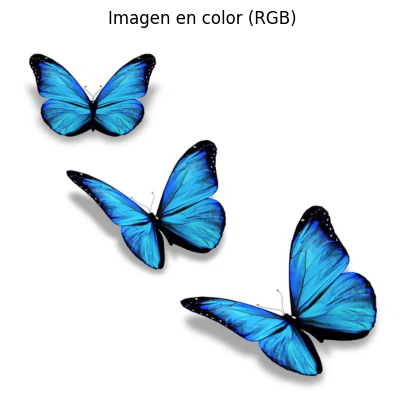

In [ ]:
bgr2 = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_rgb2 = cv2.cvtColor(bgr2, cv2.COLOR_BGR2RGB)
# Mostrar imagen en color
plt.imshow(img_rgb2)
plt.title("Imagen en color (RGB)")
plt.axis("off")
plt.show()

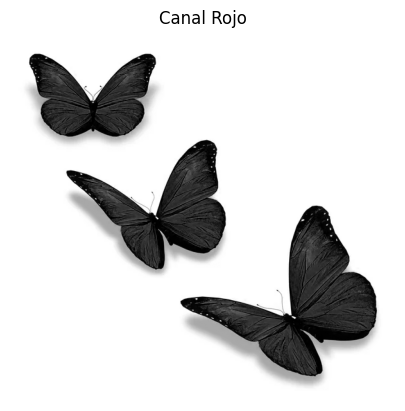

In [ ]:
# Mostrar solo el canal rojo
canal_rojo2 = img_rgb2[:, :, 0]
plt.imshow(canal_rojo2, cmap="gray")
plt.title("Canal Rojo")
plt.axis("off")
plt.show()

In [ ]:
#Imprimir forma y tipo de datos
print("Forma (alto, ancho, canales):", img_rgb2.shape)
print("Tipo de datos:", img_rgb2.dtype)

Forma (alto, ancho, canales): (576, 600, 3)
Tipo de datos: uint8


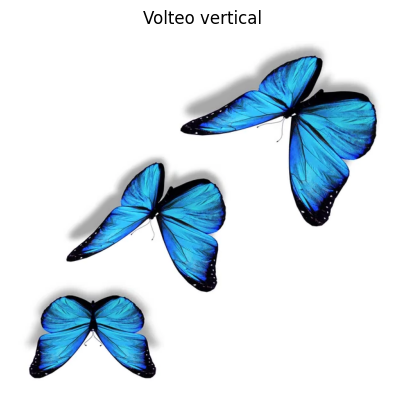

In [ ]:
# Aplicacion un flip (volteo) vertical
flip_vertical = cv2.flip(img_rgb2, 0)
plt.imshow(flip_vertical)
plt.title("Volteo vertical")
plt.axis("off")
plt.show()

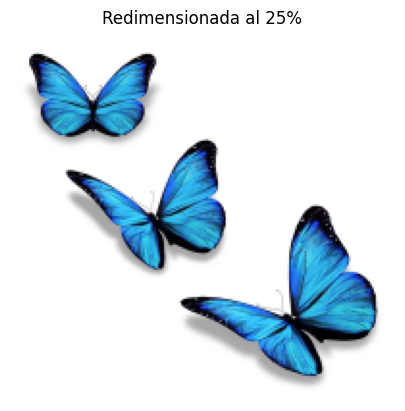

In [ ]:
# Cambio de tamaño (por ejemplo, 25% del tamaño origianl).
nuevo_ancho = img_rgb2.shape[1] // 3
nuevo_alto  = img_rgb2.shape[0] // 3
img_small = cv2.resize(img_rgb2, (nuevo_ancho, nuevo_alto), interpolation=cv2.INTER_AREA)

plt.imshow(img_small)
plt.title("Redimensionada al 25%")
plt.axis("off")
plt.show()